# Coursera2
this notebook is about scraping and cleaning data, as asked in the week3 project


In [0]:
import numpy as np
import pandas as pd

We will start by obtaining the dataframe

In [2]:
dataframe = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
dataframe

[    Postcode           Borough          Neighbourhood
 0        M1A      Not assigned           Not assigned
 1        M2A      Not assigned           Not assigned
 2        M3A        North York              Parkwoods
 3        M4A        North York       Victoria Village
 4        M5A  Downtown Toronto           Harbourfront
 ..       ...               ...                    ...
 283      M8Z         Etobicoke              Mimico NW
 284      M8Z         Etobicoke     The Queensway West
 285      M8Z         Etobicoke  Royal York South West
 286      M8Z         Etobicoke         South of Bloor
 287      M9Z      Not assigned           Not assigned
 
 [288 rows x 3 columns],
                                                   0   ...   17
 0                                                NaN  ...  NaN
 1  NL NS PE NB QC ON MB SK AB BC NU/NT YT A B C E...  ...  NaN
 2                                                 NL  ...   YT
 3                                                  A  ..

df,df1,df2 is used as it will give us Three dataframes, as shown above, for over use we will use the 1st one

In [3]:
df,df1,df2 = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
df

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
283,M8Z,Etobicoke,Mimico NW
284,M8Z,Etobicoke,The Queensway West
285,M8Z,Etobicoke,Royal York South West
286,M8Z,Etobicoke,South of Bloor


Removing Not assigned from borough

In [4]:
dff = df[df['Borough']!='Not assigned']
dff

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
...,...,...,...
282,M8Z,Etobicoke,Kingsway Park South West
283,M8Z,Etobicoke,Mimico NW
284,M8Z,Etobicoke,The Queensway West
285,M8Z,Etobicoke,Royal York South West


Grouping the rows with same Postcode with groupby function

In [5]:
dff1 = dff.groupby(['Postcode','Borough']).agg(','.join).reset_index()
dff1

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village,Martin Grove Gardens,Richvie..."
101,M9V,Etobicoke,"Albion Gardens,Beaumond Heights,Humbergate,Jam..."


Modifying the not assigned columns in Neighbourhood, by assignening the the value of the corresponding borough

In [6]:
i = 0
for v in dff1['Neighbourhood']:
  i = i+1
  if(v == 'Not assigned'):
    v = dff1['Borough'][i]
dff1

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village,Martin Grove Gardens,Richvie..."
101,M9V,Etobicoke,"Albion Gardens,Beaumond Heights,Humbergate,Jam..."


In [7]:
dff1.shape

(103, 3)

So the shape is (103,3)

# 2nd part
for the 2nd part we have to add the Latitude and longitude coordinates

In [8]:
dfc = pd.read_csv('http://cocl.us/Geospatial_data')
dfc['Postcode'] = dfc['Postal Code'] 

dffc = dfc.drop(columns = 'Postal Code')
dffc

,Latitude,Longitude,Postcode
0,43.806686,-79.194353,M1B
1,43.784535,-79.160497,M1C
2,43.763573,-79.188711,M1E
3,43.770992,-79.216917,M1G
4,43.773136,-79.239476,M1H
...,...,...,...
98,43.706876,-79.518188,M9N
99,43.696319,-79.532242,M9P
100,43.688905,-79.554724,M9R
101,43.739416,-79.588437,M9V


Now we will merge the two dataframes

In [9]:
dffm = pd.merge(dff1,dffc,on='Postcode')
dffm

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village,Martin Grove Gardens,Richvie...",43.688905,-79.554724
101,M9V,Etobicoke,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",43.739416,-79.588437


# 3rd part
We will now obtain the clusters on the basis of the latitudes and longitudes

In [10]:
dffcl = dffm[['Latitude','Longitude']]
dffcl.head()

,Latitude,Longitude
0,43.806686,-79.194353
1,43.784535,-79.160497
2,43.763573,-79.188711
3,43.770992,-79.216917
4,43.773136,-79.239476


Now we will obtain the optimum number of clusters

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
k = 1
sqd = []
while(k<102):
    km = KMeans(n_clusters=k)
    km = km.fit(dffcl)
    sqd.append(km.inertia_)
    k = k+1
sqd

[1.243357019610218,
 0.6244927623699423,
 0.3561798503330313,
 0.2746349750949467,
 0.2240186813912538,
 0.18189141888964758,
 0.1538427085211399,
 0.1314543185912012,
 0.11758691177178682,
 0.10334458059195484,
 0.08993950573482523,
 0.08288215442168315,
 0.07680761557398305,
 0.06833056580281163,
 0.06379559058292528,
 0.06161273576537014,
 0.05459547376049379,
 0.05235977157372299,
 0.049839218571176624,
 0.047588916884464746,
 0.042754254631096306,
 0.042093789071936324,
 0.03999846993672191,
 0.03855531047146804,
 0.03690916990025876,
 0.034560029608594674,
 0.031650279047838174,
 0.030557126685618136,
 0.029889740225243138,
 0.028963193603397573,
 0.027101517092130146,
 0.025965379774515678,
 0.02449543161686928,
 0.02350300035147171,
 0.022471550945570636,
 0.020980017524602178,
 0.02060639992230598,
 0.01922449386896386,
 0.018132670258715036,
 0.017141689965904677,
 0.017458366102817004,
 0.01633840761698998,
 0.01475249561584184,
 0.014514559883817307,
 0.01465872253294414,
 

Visualising the elbow curve

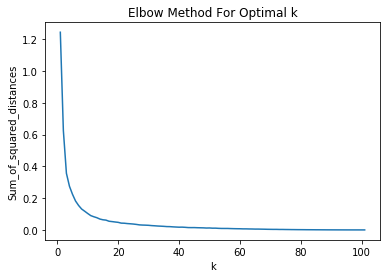

In [13]:
K = range(1,102)
plt.plot(K,sqd)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

So it can be assumed that the elbow is at 9, so nine clusters will be formed

In [18]:
kmeans = KMeans(n_clusters = 9)
kmeans = kmeans.fit(dffcl)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
X = dffcl.to_numpy()
y_kmeans = kmeans.predict(X)
y_kmeans

array([2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 2, 8, 8, 8, 2, 8, 8, 8, 8, 1,
       1, 1, 1, 8, 8, 5, 1, 4, 1, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 3, 0, 3, 0, 0, 4, 3, 3, 3, 3, 3, 0, 6, 5,
       3, 6, 3, 3, 3, 6, 6, 6, 4, 4, 4, 4, 6, 4, 6], dtype=int32)

Now, visualising the clusters

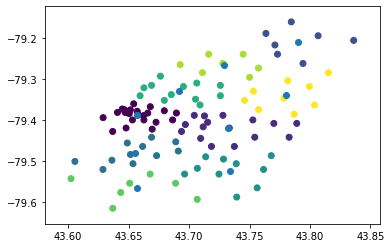

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1]);